# Objective Evaluations - Scores

In [6]:
import pandas as pd
from scipy.stats import f_oneway

In [7]:
resp_data = pd.read_csv('questionnaire\\response_summary.csv')
resp_data.head(5)

,strategy,topic,method,participant,score,competence,activity,frustration,pleasure,pressure,effort,immersion,physicality,difficulty,familarity,understanding
0,AN,AN_G,1,3,7,3,6,7,3,2,5,6,2,7,1,3
1,AN,AN_G,1,1,7,1,7,7,1,7,7,7,6,7,1,1
2,AN,AN_G,0,16,7,5,4,4,3,3,3,3,2,5,1,5
3,AN,AN_G,0,2,7,4,5,4,3,3,4,6,3,2,1,5
4,AN,AN_G,1,7,4,4,4,4,4,3,6,4,3,5,2,3


## Mix-up

In [8]:
# Group by 'method' and compute mean and std of 'score'
grouped_data = resp_data.groupby('method')['score'].agg(['mean', 'std'])

# Perform ANOVA test
anova_result = f_oneway(*[group['score'] for name, group in resp_data.groupby('method')])

# Print the mean and std of 'score' for each 'method'
print("Mean and Standard Deviation of 'score' by 'method':")
print(grouped_data)

# Print the ANOVA test result
print("\nANOVA Test Result:")
print("F-value:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

Mean and Standard Deviation of 'score' by 'method':
            mean       std
method                    
0       5.736111  1.373728
1       5.763889  1.294550

ANOVA Test Result:
F-value: 0.0155924014494345
p-value: 0.9008034354500833


## Add Strategy

In [13]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

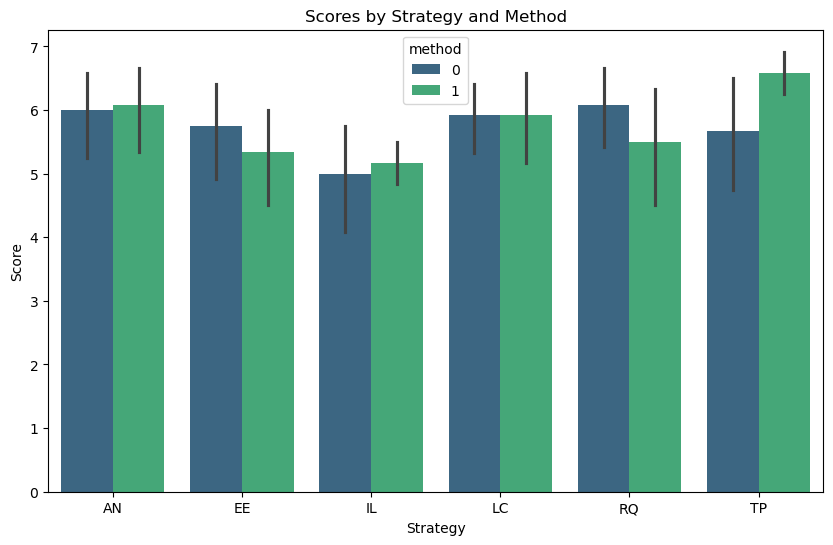

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='strategy', y='score', hue='method', data=resp_data, palette='viridis')

# Set plot title and labels
plt.title('Scores by Strategy and Method')
plt.xlabel('Strategy')
plt.ylabel('Score')

# Display the plot
plt.show()

In [16]:
# Function to perform ANOVA for each strategy
def anova_per_strategy(df):
    strategies = df['strategy'].unique()
    results = {}
    for strategy in strategies:
        subset = df[df['strategy'] == strategy]
        groups = [subset[subset['method'] == method]['score'] for method in subset['method'].unique()]
        f_val, p_val = stats.f_oneway(*groups)
        results[strategy] = {'F-value': f_val, 'p-value': p_val}
    return results

# Perform ANOVA
anova_results = anova_per_strategy(resp_data)

# Print the results
for strategy, result in anova_results.items():
    print(f"Strategy: {strategy}, F-value: {result['F-value']:.2f}, p-value: {result['p-value']:.4f}")


Strategy: AN, F-value: 0.02, p-value: 0.8762
Strategy: EE, F-value: 0.53, p-value: 0.4726
Strategy: IL, F-value: 0.12, p-value: 0.7369
Strategy: LC, F-value: 0.00, p-value: 1.0000
Strategy: RQ, F-value: 0.98, p-value: 0.3334
Strategy: TP, F-value: 2.95, p-value: 0.0999


## Add Person

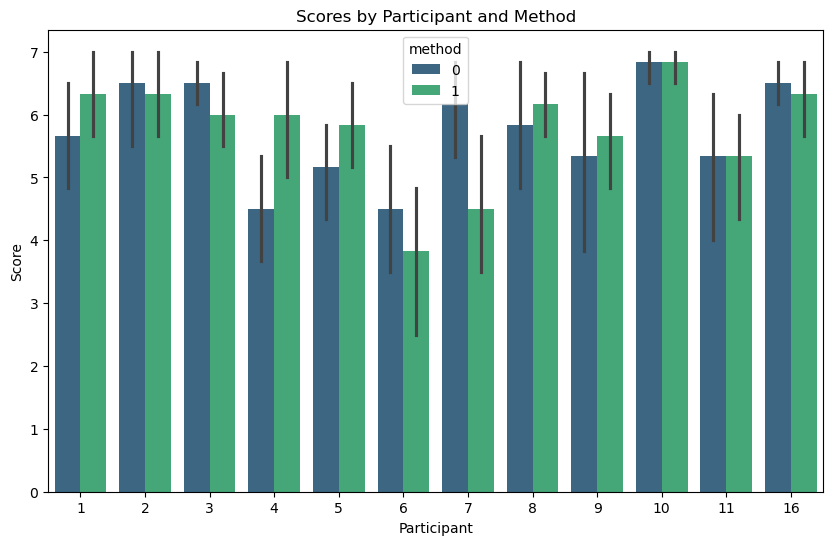

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='participant', y='score', hue='method', data=resp_data, palette='viridis')

# Set plot title and labels
plt.title('Scores by Participant and Method')
plt.xlabel('Participant')
plt.ylabel('Score')

# Display the plot
plt.show()